'Code smell created:'

count      122.000000
mean       757.950820
std       2720.958924
min          0.000000
25%          2.000000
50%         30.500000
75%        329.500000
max      25706.000000
Name: TOTAL_ADD, dtype: float64

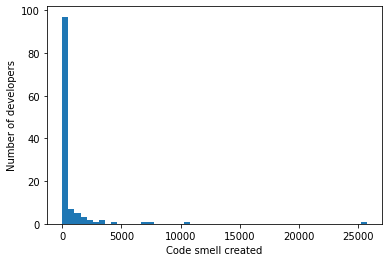

'Shapiro-Wilk Test Statistics=0.190, p=0.000'

'Shapiro-Wilk Test Sample does not look Gaussian (reject H0)'

'Kolmogorv-Smirnov Test Statistics=0.748, p=0.000'

'Kolmogorv-Smirnov Test Sample does not look Gaussian (reject H0)'

In [3]:
from IPython import get_ipython
get_ipython().magic('reset -sf')
import pyodbc
import pandas as pd
import scipy.stats as stats
from Query import Query
from configuration import Configuration
from matplotlib import pyplot
from IPython.core.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 0)
def showData( legenda, coluna, dataframes):
    display(legenda + ":")
    totalAdd = dataframes[coluna]
    s = pd.Series(totalAdd)
    display(s.describe())
    pyplot.ylabel('Number of developers')
    pyplot.xlabel(legenda)
    pyplot.hist(totalAdd,bins=50)
    pyplot.show()
    alpha = 0.05
    stat, p = stats.shapiro(dataframes)
    display('Shapiro-Wilk Test Statistics=%.3f, p=%.3f' % (stat, p))
    ''' "Your comment in here."'''
    if p > alpha:
        display('Shapiro-Wilk Test Sample looks Gaussian (fail to reject H0)')
    else:
        display('Shapiro-Wilk Test Sample does not look Gaussian (reject H0)')

    stat, p = stats.kstest(totalAdd,'norm')

    display('Kolmogorv-Smirnov Test Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        display('Kolmogorv-Smirnov Test Sample looks Gaussian (fail to reject H0)')
    else:
        display('Kolmogorv-Smirnov Test Sample does not look Gaussian (reject H0)')


def plot():
    conn = pyodbc.connect(Configuration.getConfigValue('database_connection'))
    query = Query.getQuery('normalidade')
    result = pd.read_sql_query(query,conn)
    dataframes = pd.DataFrame(result)
    if len(dataframes) == 0:
        display("No data to analyze")
    else:
        showData("Code smell created", "TOTAL_ADD",dataframes)

plot()

